# Stock Sentiment Analysis and Summarization via Web scrapping 
**CHECK OUT**<br>
<a href="https://github.com/ArshidSri/Sentiment_Analysis_Summarization_webscrapping"> source_code_github </a>(Jupyter Notebook and Python file)<br>
<a href="https://jovian.ai/arshidsriraam7/sentiment-analysis-finviz"> source_code_jovian </a>(Jupyter Notebook)

### Inspiration for the project:
Stock Market is a huge gamble for some because they are not informed with proper data to make the right decisions. People take a lot of time in deciding which Cafe they would walk into but not spend enough time on the stock they invest. It is because people have less time but this is when AI comes to the rescue. Abstractive summarization and webscrapping seems to aid us more to gather the required information to make the right decisions.
<br>
Big thumbs up to <a href="https://www.jovian.ai">Jovian</a> team for introducing the concept of sentiment analysis in their free course assignments which paved the way for the current pipelines of the project. 
<br>
Thanks to <a href="https://github.com/nicknochnack/Stock-and-Crypto-News-ScrapingSummarizationSentiment">Nicholas Reonette</a> for his work on NLP code which is highly customizable for any NLP project which is the base for the pipeline 2 of my project.

##### Structure of the project:
1. Install and Import Dependencies
2. Summarization models
- Type1: Summarization Model ------------>(Basic newspaper3k)
- Type2 Summarization Model ------------>(Financial Summarization Pegasus model)
3. News and Sentiment Pipeline 1: Finiviz website
- 3a_1 Web Scrapping from finviz website using the ticker (Output: CSV file)
- 3a_2 Web Scrapping from finviz website using the ticker_list (Output: CSV file)  
- 3a_3  View the stock as a Data_frame and perform sentiment analysis
- 3a_4 Cleaning the data in the data frame
- 3a_5 Sentiment Analysis
- 3a_6 Scraping Articles
4. News and Sentiment Pipeline 2: Stock News from Google & any Stock NEWS  website 
- 4a_1 Search for Stock News using Google and Yahoo Finance and strip out unwanted URLs
- 4a_2 Searching and Webscrapping final URLs
- 4a_3 Summarizing
- 4a_4 Adding Sentiment Analysis (Using transformers)
- 4a_5 Export to CSV 

##### Module references:
1. Webscraping modules:
- <a href="https://pypi.org/project/requests/">Requests Module</a>:
The request module is a boon for webscrappers. It helps developers to return back the HTML code of the target webpage.
- <a href="https://pypi.org/project/beautifulsoup4/">Beautiful soup</a>:
If you are a web developer you will parreciate BeautifulSoup for it will breakdown the complex HTML page to readable and scrappable soup object.(bs4.BeautifulSoup)
2. Standard modules:
- <a href ="https://pandas.pydata.org/docs/getting_started/install.html">Pandas module</a>:
It is well know tool in a data developers tool kit to handle large volumes of data and to gain inference or search information via corelation, grouping, sorting and extended data analysis.
- <a href="https://numpy.org/install/">Numpy module</a>:
In simple words it makes mathematical operations on data a piece of cake.Application of matrices and array calculation form the heart of this modules. Pandas is built on it as well.
- <a href="https://pypi.org/project/matplotlib/">Matplotlib</a>:
Ofcourse people want to see cool visuals and also visuals convey a lot better than texts on the screen. Dont worry matplotlib has got your back.
3. Sentiment analyser modules:
- <a href = "https://www.nltk.org/">NLTK</a>:
Thanks to Jovian team for introducing me to the concept of sentiment analysis. It is basically processing text data and infer emotions from them. When it comes to Natural Language Processing NLTK and Hugging face transformers sought of have an edge in the present market.
- <a href='https://textblob.readthedocs.io/en/dev/'>Textblob</a>:
A light weight sentiment analyser used in the first pipeline of my project.
- <a href="https://huggingface.co/transformers/">Transformers</a>:
A sentiment analyzer in transformer's arsenal.
4. Article summarization:
- <a href="https://newspaper.readthedocs.io/en/latest/Newspaper3k">Newspaper3k</a>:
It is a light abstractive summarization python library that helps you to summarize the given text.
- <a href="https://huggingface.co/human-centered-summarization/financial-summarization-pegasus">financial-summarization-pegasus</a>:
A deep learning arsenal basically meant for NLP projects. In this project we will be using pegaus financial summarization.

# 1. Install and Import Dependencies

In [ ]:
# Requests Module
!pip install requests --upgrade --quiet

In [ ]:
# Parse and read html
!pip install beautifulsoup4 --upgrade --quiet  

In [ ]:
# handling and Manipulating Tabular Data
!pip install pandas --upgrade --quiet
# Numerical operations
!pip install numpy
# visualizer
!pip install matplotlib

In [ ]:
# Sentiment analyzer
!pip install -U textblob --upgrade --quiet

In [ ]:
# NLTK Module
# Using natural language tool kit to import stop words
# Sentiment analyzer
!pip install nltk --upgrade  --quiet 

In [ ]:
# nltk downloads for the Project
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [ ]:
# Basic aricle summarization
!pip install newspaper3k --upgrade --quiet

In [ ]:
# Deep learning article summarization
!pip install transformers --upgrade --quiet

In [2]:
# Import the necessary libraries ------> requests
import requests
from urllib.request import urlopen,Request

In [3]:
# Import the necessary libraries ------> BeautifulSoup
from bs4 import BeautifulSoup

In [32]:
# Import the necessary libraries ------> Pandas,numpy,matplotlib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# Import the necessary libraries ------> nltk Module, sentiment analyser nltk vader
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
# Import the necessary libraries ------> sentiment analyser textblob
from textblob import TextBlob
from textblob import Word

In [7]:
# Import the necessary libraries ------> basic aricle summarization 
from newspaper import Article

In [8]:
# Import the necessary libraries ------> Deep Learning Summarization
from transformers import PegasusTokenizer, PegasusForConditionalGeneration
# Import the necessary libraries ------> sentiment analyser Pegasus
from transformers import pipeline

In [9]:
# Strip out unwanted URLs
import re 

In [10]:
# create CSVStock Sentiment Analysis and Summarization via Web scrapping
import csv

# 2. Summarization models

The summarization models abstracts the given text to logical and concise summarization.</br>

Example:<a href="https://huggingface.co/human-centered-summarization/financial-summarization-pegasus">Source:Huggingface Financial-summarization-pegasus</a> </br>

**Input**</br>

National Commercial Bank (NCB), Saudi Arabia’s largest lender by assets, agreed to buy rival Samba Financial Group for 15 dollars billion in the biggest banking takeover this year.NCB will pay 28.45 riyals (dollars7.58) for each Samba share, according to a statement on Sunday, valuing it at about 55.7 billion riyals. NCB will offer 0.739 new shares for each Samba share, at the lower end of the 0.736-0.787 ratio the banks set when they signed an initial framework agreement in June.The offer is a 3.5 percentage premium to Samba’s Oct. 8 closing price of 27.50 riyals and about 24 percentage higher than the level the shares traded at before the talks were made public. Bloomberg News first reported the merger discussions.The new bank will have total assets of more than 220 billion, creating the Gulf region third-largest lender. The entity’s 46 billion market capitalization nearly matches that of Qatar National Bank QPSC, which is still the Middle East’s biggest lender with about 268 billion of assets. </br>

**Output**</br>

NCB to pay 28.45 riyals for each Samba share. Deal will create Gulf region’s third-largest lender

# Type1: Summarization Model (Basic newspaper3k)

All the three function takes inputs such as URLs, df(url) and file(url) and scrapes the articles.

In [11]:
"""     Get the Article....
#author=[],article_date= []
#author.append(article.authors),article_date.append(article.publish_date),df and file and scrapes the Urls for summaries.
"""    
def newspaper3k_summary_from_df(df,column_url_name="URL",output_file_name='summaries'):
    url_df= df[column_url_name]
    article_summary=[]
    title=[]
    counter= 0
    for url in url_df:
        try:
            article = Article(url)
            article.download()
            article.parse()
            article.nlp()
            title.append(article.title)
            article_summary.append(article.summary)
            counter+=1
            print(counter)
        except Exception as e:
            title.append(e)
            article_summary.append(e)
            counter+=1
            print(counter)
    data = {'Article_title':title,"Article_summary": article_summary}#"Date_Time":article_date,"Author": author,
    summary_df = pd.DataFrame.from_dict(data)
    summary_df["URL"] =url_df
    summary_df.to_csv(output_file_name+".csv")
    print(output_file_name+".csv is created")
    return summary_df
def newspaper3k_summary_from_csvfile(file_name,output_file_name='summaries'):
    df = pd.read_csv(file_name).drop(["Unnamed: 0"],axis = 1)
    url_df= df["URL"]
    article_summary=[]
    title=[]
    counter= 0
    for url in url_df:
        try:
            article = Article(url)
            article.download()
            article.parse()
            article.nlp()
            title.append(article.title)
            article_summary.append(article.summary)
            counter+=1
            print(counter)
        except Exception as e:
            title.append(e)
            article_summary.append(e)
            counter+=1
            print(counter)    
    data = {'Article_title':title,"Article_summary": article_summary}
    summary_df = pd.DataFrame.from_dict(data)
    summary_df["URL"] =url_df
    summary_df.to_csv(output_file_name+".csv")
    print(output_file_name+".csv is created")
    return summary_df

# Type2 Summarization Model (Financial Summarization Pegasus model)

In [ ]:
#model_setup
model_name = "human-centered-summarization/financial-summarization-pegasus"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

In [ ]:
def pegasus_summarize(articles):
    try:
        summaries = []
        for article in articles:
            input_ids = tokenizer.encode(article, return_tensors='pt')
            output = model.generate(input_ids, max_length=55, num_beams=5, early_stopping=True)
            summary = tokenizer.decode(output[0], skip_special_tokens=True)
            summaries.append(summary)
    except Exception as e:
            summaries.append(e)
    return summaries

## 3A News and Sentiment Pipeline 1: Finiviz website

### 3a_1     Web Scrapping from finviz website using the ticker (Output: CSV file)

1. function: **finviz_parser_data(ticker)**: This function is defined to scrape from the <a href="https://finviz.com/quote.ashx?t={}">Finviz website</a> using the requests library. Then the downloaded content should have a status code of 200 or greater.</br>
The BeautifulSoup class is used to parse the html response and returned as soup. It is to be noted that soup is bs4.BeautifulSoup.</br>
</br>
2. function: **correct_time_formatting(time_data)**: This function helps to rectify the bad date & time format acquired from the finviz website to standardized format. 
- Before the function execution: </br>
	
0	Sep-20-21 07:53AM  
1	06:48AM  
2	06:46AM  
3	12:01AM  
4	Sep-19-21 06:45AM  
5	Sep-18-21 05:50PM  
6	10:34AM  
</br>
- After the function execution: </br>
	
0	Sep-20-21 07:53AM  
1	Sep-20-21 06:48AM  
2	Sep-20-21 06:46AM  
3	Sep-20-21 12:01AM  
4	Sep-19-21 06:45AM  
5	Sep-18-21 05:50PM  
6	Sep-18-21 10:34AM  

3. function: **finviz_create_write_data(soup,file_name="MSFT")**: The soup is passed as position argument and the file_name is passed as keyword argument hence the file_name is customizable. </br>
Example: finviz_create_write_data(soup,file_name="Amazon") </br>
The function basically scrapes the Url,time, News Reporter and News headline. </br>
It creates a dataframe using Pandas and writes it to a CSV and also returns the dataframe. </br>

In [12]:

def finviz_parser_data(ticker):
    
    url = 'https://finviz.com/quote.ashx?t={}'.format(ticker)
    # sending request for getting the html code of the Url
    try:
        request = Request(url=url,headers={'user-agent':'my-app'})
        response = urlopen(request)

        #parsing the HTML with BeautifulSoup
        soup = BeautifulSoup(response,'html')
        return soup
    except Exception as e:
        print(e)
    
def correct_time_formatting(time_data):
    date = []
    time=[]
    for z in time_data:
        a = z.split(" ")
        if len(a) == 2:
            date.append(a[0])
            time.append(a[1])
        else:
            date.append("r")
            time.append(a[0])
    l=0
    r=1
    lister=[]
    #print(l,r)
    while r<len(date):
        if len(date[r]) ==9:
            lister.append(date[l:r])
            #print(l,r)
            l=r
            #print(l,r)
        elif r== len(date)-1:                      
                r=len(date)    
                #print(l,r)
                lister.append(date[l:r])
        r+=1
    n =0
    while n <len(lister):

        lister[n] =[lister[n][0] for x in lister[n] if x=='r' or x==lister[n][0] ]
        n+=1
    final_time= []
    y =0
    while y<len(lister):
        final_time+=lister[y]
        y+=1    
    count = 0
    time_correct =[]
    while count<len(final_time):
        time_correct.append((final_time[count]+" "+time[count]))
        count+=1
    return time_correct

def finviz_create_write_data(soup,file_name="MSFT"):   
    try:
        news_reporter_title = [row.text for row in soup.find_all(class_ ='news-link-right') if row is not None]
        #news_reporter_title
        news_reported = [row.text for row in soup.find_all(class_ ='news-link-left') if row is not None]
        #news_reported
        news_url = [row.find('a',href=True)["href"] for row in soup.find_all(class_ ='news-link-left') if row is not None]
        '''
        solution 2:
        atags = [row.find('a') for row in soup.find_all(class_ ='news-link-left') if row is not None]
        news_url = [link['href'] for link in atags]
        '''
        date_data = [row.text for row in soup.find_all('td', attrs ={"width":"130",'align':'right'}) if row is not None]
        time = correct_time_formatting(date_data)
    except Exception as e:
        print(e)
    data = { "Time":time,'News Reporter': news_reporter_title,"News Headline": news_reported, "URL": news_url }
    finviz_news_df = pd.DataFrame.from_dict(data)
    finviz_news_df.to_csv(file_name + '_finviz_stock.csv')
    print(file_name + "_finviz_stock.csv is created" )
    return finviz_news_df

In [13]:
soup = finviz_parser_data("TSLA")
finviz_create_write_data(soup,file_name="Tesla")

Tesla_finviz_stock.csv is created


,Time,News Reporter,News Headline,URL
0,Sep-21-21 09:31AM,Investor's Business Daily,Dow Jones Rallies 150 Points After Market Sell...,https://www.investors.com/market-trend/stock-m...
1,Sep-21-21 08:57AM,Bloomberg,Texas Startups Mount Fight Against Abortion Ba...,https://finance.yahoo.com/news/texas-startups-...
2,Sep-21-21 07:25AM,Zacks,Li Auto (LI) Slashes Q3 Delivery Forecast Amid...,https://finance.yahoo.com/news/li-auto-li-slas...
3,Sep-21-21 07:18AM,Investor's Business Daily,Dow Jones Futures Rebound After Stock Market S...,https://www.investors.com/market-trend/stock-m...
4,Sep-21-21 06:09AM,Reuters,A life and death question for regulators: Is T...,https://finance.yahoo.com/news/life-death-regu...
...,...,...,...,...
95,Sep-15-21 09:54AM,Yahoo Finance Video,Xpeng launches P5 Sedan with starting price ar...,https://finance.yahoo.com/video/xpeng-launches...
96,Sep-15-21 08:59AM,Insider Monkey,Cathie Wood Is Selling These 10 Stocks,https://finance.yahoo.com/news/cathie-wood-sel...
97,Sep-15-21 07:00AM,Yahoo Finance Video,This is the single largest danger of A.I. acco...,https://finance.yahoo.com/video/single-largest...
98,Sep-15-21 06:02AM,Bloomberg,"Cathie Wood Sells $66 Million of Tesla Shares,...",https://finance.yahoo.com/news/cathie-wood-sel...


### 3a_2 Web Scrapping from finviz website using the ticker_list (Output: CSV file)  
- finviz_url = 'https://finviz.com/quote.ashx?t='

1.function:**create_csv_ticker_list(ticker_list)**: This function automates the process for a ticker_list containing multiple stocks.

In [14]:
ticker_list = ['WOOF','MSFT',"GOOG",'FB',"AMZN"]

In [15]:
def create_csv_ticker_list(ticker_list):
    try:
        for ticker in ticker_list:
            soup = finviz_parser_data(ticker)
            finviz_create_write_data(soup,file_name=ticker)
    except Exception as e:
        print(e)

In [16]:
create_csv_ticker_list(ticker_list)

WOOF_finviz_stock.csv is created
MSFT_finviz_stock.csv is created
GOOG_finviz_stock.csv is created
FB_finviz_stock.csv is created
AMZN_finviz_stock.csv is created


### 3a_3  View the stock as a Data_frame and perform sentiment analysis

1.**def finviz_view_pandas_dataframe(ticker)**:Sometimes an analyst needs to perform calculations on the dataframe from a paricular stock this function aids in the process of analysis.</br>

**For an example let us take Google stock and analyse**

In [17]:
def finviz_view_pandas_dataframe(ticker):
    url = 'https://finviz.com/quote.ashx?t={}'.format(ticker)
    # sending request for getting the html code of the Url
    try:
        request = Request(url=url,headers={'user-agent':'my-app'})
        response = urlopen(request)
        news_reporter_title = [row.text for row in soup.find_all(class_ ='news-link-right') if row is not None]
        news_reported = [row.text for row in soup.find_all(class_ ='news-link-left') if row is not None]
        news_url = [row.find('a',href=True)["href"] for row in soup.find_all(class_ ='news-link-left') if row is not None]
        date_data = [row.text for row in soup.find_all('td', attrs ={"width":"130",'align':'right'}) if row is not None]
        time = correct_time_formatting(date_data)
    except Exception as e:
        print(e)
    data = { "Time":time,'News Reporter': news_reporter_title,"News Headline": news_reported, "URL": news_url }
    finviz_news_df = pd.DataFrame.from_dict(data)
    return finviz_news_df

In [18]:
google_stock = finviz_view_pandas_dataframe('GOOG')
google_stock

,Time,News Reporter,News Headline,URL
0,Sep-21-21 09:31AM,Investor's Business Daily,Dow Jones Rallies 150 Points After Market Sell...,https://www.investors.com/market-trend/stock-m...
1,Sep-21-21 08:57AM,Bloomberg,Texas Startups Mount Fight Against Abortion Ba...,https://finance.yahoo.com/news/texas-startups-...
2,Sep-21-21 07:25AM,Zacks,Li Auto (LI) Slashes Q3 Delivery Forecast Amid...,https://finance.yahoo.com/news/li-auto-li-slas...
3,Sep-21-21 07:18AM,Investor's Business Daily,Dow Jones Futures Rebound After Stock Market S...,https://www.investors.com/market-trend/stock-m...
4,Sep-21-21 06:09AM,Reuters,A life and death question for regulators: Is T...,https://finance.yahoo.com/news/life-death-regu...
...,...,...,...,...
95,Sep-15-21 09:54AM,Yahoo Finance Video,Xpeng launches P5 Sedan with starting price ar...,https://finance.yahoo.com/video/xpeng-launches...
96,Sep-15-21 08:59AM,Insider Monkey,Cathie Wood Is Selling These 10 Stocks,https://finance.yahoo.com/news/cathie-wood-sel...
97,Sep-15-21 07:00AM,Yahoo Finance Video,This is the single largest danger of A.I. acco...,https://finance.yahoo.com/video/single-largest...
98,Sep-15-21 06:02AM,Bloomberg,"Cathie Wood Sells $66 Million of Tesla Shares,...",https://finance.yahoo.com/news/cathie-wood-sel...


In [19]:
google_stock["Time_pdformat"]= pd.to_datetime(google_stock['Time'],infer_datetime_format=True)
google_stock

,Time,News Reporter,News Headline,URL,Time_pdformat
0,Sep-21-21 09:31AM,Investor's Business Daily,Dow Jones Rallies 150 Points After Market Sell...,https://www.investors.com/market-trend/stock-m...,2021-09-21 09:31:00
1,Sep-21-21 08:57AM,Bloomberg,Texas Startups Mount Fight Against Abortion Ba...,https://finance.yahoo.com/news/texas-startups-...,2021-09-21 08:57:00
2,Sep-21-21 07:25AM,Zacks,Li Auto (LI) Slashes Q3 Delivery Forecast Amid...,https://finance.yahoo.com/news/li-auto-li-slas...,2021-09-21 07:25:00
3,Sep-21-21 07:18AM,Investor's Business Daily,Dow Jones Futures Rebound After Stock Market S...,https://www.investors.com/market-trend/stock-m...,2021-09-21 07:18:00
4,Sep-21-21 06:09AM,Reuters,A life and death question for regulators: Is T...,https://finance.yahoo.com/news/life-death-regu...,2021-09-21 06:09:00
...,...,...,...,...,...
95,Sep-15-21 09:54AM,Yahoo Finance Video,Xpeng launches P5 Sedan with starting price ar...,https://finance.yahoo.com/video/xpeng-launches...,2021-09-15 09:54:00
96,Sep-15-21 08:59AM,Insider Monkey,Cathie Wood Is Selling These 10 Stocks,https://finance.yahoo.com/news/cathie-wood-sel...,2021-09-15 08:59:00
97,Sep-15-21 07:00AM,Yahoo Finance Video,This is the single largest danger of A.I. acco...,https://finance.yahoo.com/video/single-largest...,2021-09-15 07:00:00
98,Sep-15-21 06:02AM,Bloomberg,"Cathie Wood Sells $66 Million of Tesla Shares,...",https://finance.yahoo.com/news/cathie-wood-sel...,2021-09-15 06:02:00


### 3a_4 Cleaning the data in the data frame

1. function:**clean_data(df,column_filter ='News Headline',other_column='Time')**:The sentiment analyzer that we use if effecient like transformers or lower effecient analyzer works much better when the text is cleaned like lower casing, removing punctuation marks, removing stop words and lemmatizing the text. 
2. function:**(Optional)find_unnecessary_stop_words(df,count) & cleaning_secondary(df,apply_column = "lemmatizated"):**
The other stop words has to be finded by manual search and these functions aid the process.

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def clean_data(df,column_filter ='News Headline',other_column='Time_pdformat'):
    try:
        new_df = df.filter([column_filter,other_column])
        new_df['lower_case_headlines'] = new_df[column_filter].apply(lambda x: " ".join(word.lower() for word in x.split()))
        new_df['punctuation_remove'] = new_df['lower_case_headlines'].str.replace("[^\w\s]","",regex = True)
        new_df["stop_words_removed"] = new_df['punctuation_remove'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
        new_df['lemmatizated'] = new_df["stop_words_removed"].apply(lambda x: ' '.join(Word(word).lemmatize() for word in x.split()))
        return new_df
    except Exception as e:
        print(e)
# To find other unnecessary stop word -------->Optional function
def find_unnecessary_stop_words(df,count):
    try:
        series = pd.Series(''.join(df["lemmatizated"]).split()).value_counts()[:count]
        return series
    except Exception as e:
        print(e)
def cleaning_secondary(df,apply_column = "lemmatizated"):
    try:
        df['final_sentiment_cleaned'] =df[apply_column].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words ))
        return df
    except Exception as e:
        print(e)

In [22]:
cleaned_df = clean_data(google_stock,column_filter ='News Headline',other_column='Time_pdformat') #other_column is generally time field in df
cleaned_df

,News Headline,Time_pdformat,lower_case_headlines,punctuation_remove,stop_words_removed,lemmatizated
0,Dow Jones Rallies 150 Points After Market Sell...,2021-09-21 09:31:00,dow jones rallies 150 points after market sell...,dow jones rallies 150 points after market sell...,dow jones rallies 150 points market selloff 4 ...,dow jones rally 150 point market selloff 4 tec...
1,Texas Startups Mount Fight Against Abortion Ba...,2021-09-21 08:57:00,texas startups mount fight against abortion ba...,texas startups mount fight against abortion ba...,texas startups mount fight abortion banwithout...,texas startup mount fight abortion banwithout ...
2,Li Auto (LI) Slashes Q3 Delivery Forecast Amid...,2021-09-21 07:25:00,li auto (li) slashes q3 delivery forecast amid...,li auto li slashes q3 delivery forecast amid c...,li auto li slashes q3 delivery forecast amid c...,li auto li slash q3 delivery forecast amid chi...
3,Dow Jones Futures Rebound After Stock Market S...,2021-09-21 07:18:00,dow jones futures rebound after stock market s...,dow jones futures rebound after stock market s...,dow jones futures rebound stock market sells c...,dow jones future rebound stock market sell chi...
4,A life and death question for regulators: Is T...,2021-09-21 06:09:00,a life and death question for regulators: is t...,a life and death question for regulators is te...,life death question regulators teslas autopilo...,life death question regulator tesla autopilot ...
...,...,...,...,...,...,...
95,Xpeng launches P5 Sedan with starting price ar...,2021-09-15 09:54:00,xpeng launches p5 sedan with starting price ar...,xpeng launches p5 sedan with starting price ar...,xpeng launches p5 sedan starting price around ...,xpeng launch p5 sedan starting price around 245k
96,Cathie Wood Is Selling These 10 Stocks,2021-09-15 08:59:00,cathie wood is selling these 10 stocks,cathie wood is selling these 10 stocks,cathie wood selling 10 stocks,cathie wood selling 10 stock
97,This is the single largest danger of A.I. acco...,2021-09-15 07:00:00,this is the single largest danger of a.i. acco...,this is the single largest danger of ai accord...,single largest danger ai according expert kaif...,single largest danger ai according expert kaif...
98,"Cathie Wood Sells $66 Million of Tesla Shares,...",2021-09-15 06:02:00,"cathie wood sells $66 million of tesla shares,...",cathie wood sells 66 million of tesla shares a...,cathie wood sells 66 million tesla shares adds...,cathie wood sell 66 million tesla share add ro...


In [23]:
series = find_unnecessary_stop_words(cleaned_df,30)
series

tesla         27
stock         21
ev             9
jones          9
electric       7
china          6
buy            6
musk           6
wood           6
fall           6
market         6
ntsb           5
elon           5
car            5
auto           5
fear           5
new            5
kaifu          4
apple          4
evergrande     4
share          4
regulator      4
point          4
million        4
space          4
chinese        4
get            4
sell           4
rally          3
selling        3
dtype: int64

In [24]:
# manual analysis
other_stop_words = ['ev','pickup',"stock",'china']

In [25]:
cleaned_final = cleaning_secondary(cleaned_df)
cleaned_final

,News Headline,Time_pdformat,lower_case_headlines,punctuation_remove,stop_words_removed,lemmatizated,final_sentiment_cleaned
0,Dow Jones Rallies 150 Points After Market Sell...,2021-09-21 09:31:00,dow jones rallies 150 points after market sell...,dow jones rallies 150 points after market sell...,dow jones rallies 150 points market selloff 4 ...,dow jones rally 150 point market selloff 4 tec...,dow jones rally 150 point market selloff 4 tec...
1,Texas Startups Mount Fight Against Abortion Ba...,2021-09-21 08:57:00,texas startups mount fight against abortion ba...,texas startups mount fight against abortion ba...,texas startups mount fight abortion banwithout...,texas startup mount fight abortion banwithout ...,texas startup mount fight abortion banwithout ...
2,Li Auto (LI) Slashes Q3 Delivery Forecast Amid...,2021-09-21 07:25:00,li auto (li) slashes q3 delivery forecast amid...,li auto li slashes q3 delivery forecast amid c...,li auto li slashes q3 delivery forecast amid c...,li auto li slash q3 delivery forecast amid chi...,li auto li slash q3 delivery forecast amid chi...
3,Dow Jones Futures Rebound After Stock Market S...,2021-09-21 07:18:00,dow jones futures rebound after stock market s...,dow jones futures rebound after stock market s...,dow jones futures rebound stock market sells c...,dow jones future rebound stock market sell chi...,dow jones future rebound market sell property ...
4,A life and death question for regulators: Is T...,2021-09-21 06:09:00,a life and death question for regulators: is t...,a life and death question for regulators is te...,life death question regulators teslas autopilo...,life death question regulator tesla autopilot ...,life death question regulator tesla autopilot ...
...,...,...,...,...,...,...,...
95,Xpeng launches P5 Sedan with starting price ar...,2021-09-15 09:54:00,xpeng launches p5 sedan with starting price ar...,xpeng launches p5 sedan with starting price ar...,xpeng launches p5 sedan starting price around ...,xpeng launch p5 sedan starting price around 245k,xpeng launch p5 sedan starting price around 245k
96,Cathie Wood Is Selling These 10 Stocks,2021-09-15 08:59:00,cathie wood is selling these 10 stocks,cathie wood is selling these 10 stocks,cathie wood selling 10 stocks,cathie wood selling 10 stock,cathie wood selling 10
97,This is the single largest danger of A.I. acco...,2021-09-15 07:00:00,this is the single largest danger of a.i. acco...,this is the single largest danger of ai accord...,single largest danger ai according expert kaif...,single largest danger ai according expert kaif...,single largest danger ai according expert kaif...
98,"Cathie Wood Sells $66 Million of Tesla Shares,...",2021-09-15 06:02:00,"cathie wood sells $66 million of tesla shares,...",cathie wood sells 66 million of tesla shares a...,cathie wood sells 66 million tesla shares adds...,cathie wood sell 66 million tesla share add ro...,cathie wood sell 66 million tesla share add ro...


### 3a_5 Sentiment Analysis

#### From Dataframe
1.function: **sentiment_analyzer(df,column_applied_df = "final_sentiment_cleaned",other_column="Time_pdformat")**:Basically the function uses sentiment analyzers like nltk vader and textblob with df as input.

In [26]:
def sentiment_analyzer(df,column_applied_df = "final_sentiment_cleaned",other_column="Time_pdformat"):
    try:
        
        analyzer = SentimentIntensityAnalyzer()
        df['nltk_subjective'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['compound'])
        df['nltk_positive'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['pos'])
        df['nltk_neutral'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['neu'])
        df['nltk_negative'] = df[column_applied_df].apply(lambda x: analyzer.polarity_scores(x)['neg'])
        df['textblob_polarity'] = df[column_applied_df].apply(lambda x: TextBlob(x).sentiment[0])
        df['textblob_subjective'] = df[column_applied_df].apply(lambda x: TextBlob(x).sentiment[1])
        #'nltk_positive','nltk_neutral','nltk_negative',
        new_df = df.filter([other_column,'News Headline',column_applied_df,'nltk_subjective','textblob_polarity','textblob_subjective'])
        return new_df
    except Exception as e:
        print(e)
        #(Optional)
        #sentiment = pipeline('sentiment-analysis')
        #df['transformers_label']= df[column_applied_df].apply(lambda x: sentiment(x)['label'])
        #df['transformers_score']= df[column_applied_df].apply(lambda x: sentiment(x)['score'])

In [27]:
sentiment = sentiment_analyzer(cleaned_final,column_applied_df = "final_sentiment_cleaned") #other_column is generally time field in df
sentiment

,Time_pdformat,News Headline,final_sentiment_cleaned,nltk_subjective,textblob_polarity,textblob_subjective
0,2021-09-21 09:31:00,Dow Jones Rallies 150 Points After Market Sell...,dow jones rally 150 point market selloff 4 tec...,0.0000,0.000000,1.000000
1,2021-09-21 08:57:00,Texas Startups Mount Fight Against Abortion Ba...,texas startup mount fight abortion banwithout ...,-0.3818,0.000000,0.100000
2,2021-09-21 07:25:00,Li Auto (LI) Slashes Q3 Delivery Forecast Amid...,li auto li slash q3 delivery forecast amid chi...,-0.6597,0.000000,0.000000
3,2021-09-21 07:18:00,Dow Jones Futures Rebound After Stock Market S...,dow jones future rebound market sell property ...,0.0516,0.250000,0.312500
4,2021-09-21 06:09:00,A life and death question for regulators: Is T...,life death question regulator tesla autopilot ...,-0.2500,0.500000,0.500000
...,...,...,...,...,...,...
95,2021-09-15 09:54:00,Xpeng launches P5 Sedan with starting price ar...,xpeng launch p5 sedan starting price around 245k,0.0000,0.000000,0.100000
96,2021-09-15 08:59:00,Cathie Wood Is Selling These 10 Stocks,cathie wood selling 10,0.0000,0.000000,0.000000
97,2021-09-15 07:00:00,This is the single largest danger of A.I. acco...,single largest danger ai according expert kaif...,-0.5267,-0.071429,0.214286
98,2021-09-15 06:02:00,"Cathie Wood Sells $66 Million of Tesla Shares,...",cathie wood sell 66 million tesla share add ro...,0.2960,0.000000,0.000000


In [28]:
sentiment_df= sentiment.sort_values(by=['nltk_subjective','textblob_polarity',"textblob_subjective"],ascending=[True,True,True],na_position='first')
sentiment_df

,Time_pdformat,News Headline,final_sentiment_cleaned,nltk_subjective,textblob_polarity,textblob_subjective
9,2021-09-20 15:28:00,Dow Jones Dives 900 Points Amid China Fears; N...,dow jones dive 900 point amid fear nvidia flas...,-0.7964,0.0,0.000000
14,2021-09-20 13:30:00,Here's the biggest risk from the Evergrande cr...,here biggest risk evergrande crisis say goldma...,-0.7351,0.0,0.000000
41,2021-09-17 17:24:00,UPDATE 1-U.S. NTSB to probe fatal Tesla crash ...,update 1us ntsb probe fatal tesla crash florida,-0.7351,0.0,0.000000
15,2021-09-20 13:28:00,Teslas Elon Musk Took Another Jab at Biden. It...,tesla elon musk took another jab biden bad tim...,-0.7269,-0.7,0.666667
27,2021-09-20 08:26:00,"Tesla, Nio stocks fall as Li Auto deliveries w...",tesla nio fall li auto delivery warning evergr...,-0.6808,0.0,0.000000
...,...,...,...,...,...,...
58,2021-09-17 06:38:00,Teslas Elon Musk Praises Chinese Rivals Like N...,tesla elon musk praise chinese rival like nio ...,0.7269,0.0,0.000000
21,2021-09-20 10:31:00,Why Rocket Lab is the best space asset to hit ...,rocket lab best space asset hit market last year,0.7717,0.5,0.183333
59,2021-09-17 01:49:00,Lucid Poised to Extend Gains on EPA Recognitio...,lucid poised extend gain epa recognition air d...,0.7964,0.0,0.000000
87,2021-09-15 16:25:00,Dow Jones Rises As Nasdaq Rallies; Tesla Gains...,dow jones rise nasdaq rally tesla gain despite...,0.8065,0.0,0.000000


In [29]:
sentiment_df.to_csv('sentiment_google.csv')
print("file created")

file created


In [41]:
# Visualization function
def matplotlib_sentiment(dates,values):
    try:
        graph_data = plt.scatter(dates,values)
        return graph_data
    except Exception as e:
        print(e)

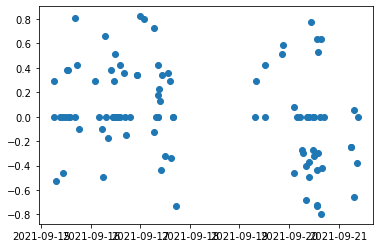

In [42]:
matplotlib_sentiment(sentiment_df['Time_pdformat'],sentiment_df["nltk_subjective"])

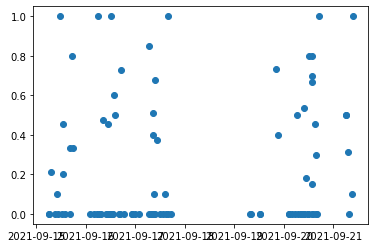

In [43]:
matplotlib_sentiment(sentiment_df['Time_pdformat'],sentiment_df["textblob_subjective"])

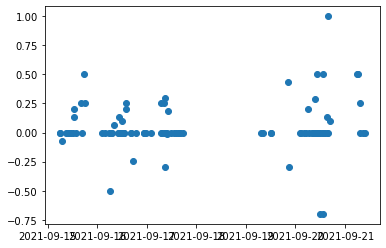

In [44]:
matplotlib_sentiment(sentiment_df['Time_pdformat'],sentiment_df["textblob_polarity"])

#### From file

In [80]:
def sentiment_analyzer_from_file(file_name):
    import pandas as pd
    try:
        df = pd.read_csv(file_name).drop(["Unnamed: 0"],axis = 1)
        clean_df = clean_data(df,column_filter ='News Headline')
        sentiment_df = sentiment_analyzer(clean_df,column_applied_df = "lemmatizated")
        return sentiment_df
    except Exception as e:
        print(e)

In [81]:
sentiment_analyzer_from_file('WOOF_finviz_stock.csv')

,News Headline,lemmatizated,nltk_subjective,textblob_polarity,textblob_subjective
0,Petco to Present at Jefferies Virtual Pet Care...,petco present jefferies virtual pet care summit,0.4939,0.000000,0.000000
1,Petco Encourages Pet Parents to Consider Their...,petco encourages pet parent consider pet menta...,0.7351,0.166667,0.466667
2,Petco Announces Expansion of PupBox With Perso...,petco announces expansion pupbox personalized ...,0.0000,0.000000,0.000000
3,Petco to Present at Goldman Sachs 28th Annual ...,petco present goldman sachs 28th annual global...,0.0000,0.000000,0.000000
4,4 Stocks Insiders Are Buying,4 stock insider buying,0.0000,0.000000,0.000000
...,...,...,...,...,...
74,Petco Stock Jumps In Debut After Third IPO Pri...,petco stock jump debut third ipo price forecast,0.0000,0.000000,0.000000
75,What strong IPO performances could mean for 2021,strong ipo performance could mean 2021,0.5106,0.060417,0.710417
76,Petco spikes 44% on its first day of trading: ...,petco spike 44 first day trading here stock,0.0000,0.250000,0.333333
77,Petco shares soar more than 50% as trading begins,petco share soar 50 trading begin,0.2960,0.000000,0.000000


### 3a_6 Scraping Articles

##### From Urls

In [96]:
#google_stock = finviz_view_pandas_dataframe('GOOG') previously executed
Url= google_stock["URL"]
Url

0     https://www.investors.com/market-trend/stock-m...
1     https://www.investors.com/news/best-chinese-st...
2     https://www.barrons.com/articles/things-to-kno...
3     https://www.barrons.com/articles/tesla-softwar...
4     https://finance.yahoo.com/news/markets-tumble-...
                            ...                        
95    https://finance.yahoo.com/news/gasoline-electr...
96    https://www.investors.com/news/ev-stocks-face-...
97    https://www.investopedia.com/top-electric-car-...
98    https://www.investors.com/research/ford-stock-...
99    https://finance.yahoo.com/video/cinema-stocks-...
Name: URL, Length: 100, dtype: object

##### From df

In [100]:
newspaper3k_summary_from_df(google_stock,output_file_name='google_summaries')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
google_summaries.csv is created


,Article_title,Article_summary,URL
0,Article `download()` failed with 403 Client Er...,Article `download()` failed with 403 Client Er...,https://www.investors.com/market-trend/stock-m...
1,Article `download()` failed with 403 Client Er...,Article `download()` failed with 403 Client Er...,https://www.investors.com/news/best-chinese-st...
2,Article `download()` failed with 403 Client Er...,Article `download()` failed with 403 Client Er...,https://www.barrons.com/articles/things-to-kno...
3,Article `download()` failed with 403 Client Er...,Article `download()` failed with 403 Client Er...,https://www.barrons.com/articles/tesla-softwar...
4,Markets Tumble on Evergrande Jitters; Energy C...,By Geoffrey SmithInvesting.com -- Global stock...,https://finance.yahoo.com/news/markets-tumble-...
...,...,...,...
95,Gasoline Or Electric: Which Is The Best Car Fo...,Tesla is better for road trips than a non-Tesl...,https://finance.yahoo.com/news/gasoline-electr...
96,Article `download()` failed with 403 Client Er...,Article `download()` failed with 403 Client Er...,https://www.investors.com/news/ev-stocks-face-...
97,Top Electric Car Stocks for Q4 2021,While some traditional automakers also produce...,https://www.investopedia.com/top-electric-car-...
98,Article `download()` failed with 403 Client Er...,Article `download()` failed with 403 Client Er...,https://www.investors.com/research/ford-stock-...


##### From file

In [104]:
newspaper3k_summary_from_csvfile("MSFT_finviz_stock.csv",output_file_name='MSFT_6_summaries')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
MSFT_6_summaries.csv is created


,Article_title,Article_summary,URL
0,Article `download()` failed with 403 Client Er...,Article `download()` failed with 403 Client Er...,https://www.investors.com/market-trend/stock-m...
1,4 Stocks to Benefit From Continued Demand for AI,"The report further stated that in 2022, the AI...",https://finance.yahoo.com/news/4-stocks-benefi...
2,Microsoft's (NASDAQ:MSFT) Dividend Will Be Inc...,Microsoft Corporation (NASDAQ:MSFT) has announ...,https://finance.yahoo.com/news/microsofts-nasd...
3,Microsoft’s new Surface Pro 8 leaks days befor...,"Microsoft’s upcoming computer, the Surface Pro...",https://finance.yahoo.com/news/microsoft-surfa...
4,Gates Raises $1 Billion as Corporate CEOs Join...,(Bloomberg) -- Bill Gates raised more than $1 ...,https://finance.yahoo.com/news/gates-raises-1-...
...,...,...,...
95,Microsoft announces quarterly dividend increas...,"The dividend is payable Dec. 9, 2021, to share...",https://finance.yahoo.com/news/microsoft-annou...
96,Microsoft (MSFT) Gains As Market Dips: What Yo...,"In the latest trading session, Microsoft (MSFT...",https://finance.yahoo.com/news/microsoft-msft-...
97,Article `download()` failed with 403 Client Er...,Article `download()` failed with 403 Client Er...,https://www.investors.com/market-trend/stock-m...
98,Stock Market Today: Dow Drops as Brief Boost F...,Deflating hot-air balloon Getty ImagesA slower...,https://finance.yahoo.com/news/stock-market-to...


### Summarizing Pipeline 1:

1. Passed a ticker value to the function to download our CSV file for the ticker.
2. Declared a ticker list and used it to scrape multiple tickers and corresponding CSV files.
3. Viewed the stock data of a selected ticker.
4. Cleaned the News headline of the data.
5. (Optional) Manually declared other_stop_words list and removed those words using the function available.
6. Apply sentiment analysis on the cleaned News Headlines.
7. Analyzed the sentiment with basic scatter plot.
8. Scraped the news articles from dataframe and csv file.

## 4B News and Sentiment Pipeline 2: Stock News from Google & any Stock NEWS  website 

This pipeline is built on <a href="https://github.com/nicknochnack/Stock-and-Crypto-News-ScrapingSummarizationSentiment">Nicholas Reonette</a>  Google news NLP project. I have heavily customised according to the needs of my project. Basically Google news URL is highly customizable and that is advantageous for our webscrapping needs. I have customized the function in such a way that the user can enter the number of results to be returned and choose the news website . In this project the default value of News agency is set to yahoo finance and number of results is set to 100 which can be changes when calling the Python function.

### 4b_1 Search for Stock News using Google and Yahoo Finance and strip out unwanted URLs
1. **def google_search_stocknews(ticker,num=100,site="yahoo+finance")**: This function takes the "ticker" as positional argument and "num" is the number of pages to search and "site" can be any reliable site.
2. **def strip_unwanted_urls(urls)**: As the name suggests it removes the unclean urls from the list and filters the urls which meets the standard.

In [82]:
tickers_2 = ['MSFT','TSLA', 'BTC']

In [84]:
def google_search_stocknews(ticker,num=100,site="yahoo+finance"):
    try:
        search_url = "https://www.google.com/search?q={}+{}&tbm=nws&num={}".format(site,ticker,num)
        # url_analysis: https://www.google.com/search?q={query}&tbm=nws&num=100
        # &tbm=nws: google new Tab, &num={} example: 100 and will return the top 100 results, query:site +ticker
        r = requests.get(search_url)
        soup = BeautifulSoup(r.text, 'html.parser')
        atags = soup.find_all('a')
        hrefs = [link['href'] for link in atags]
        return hrefs 
    except Exception as e:
        print(e)

In [85]:
#site is a Keyword argument and its default Value is yahoo+finance
#other examples of site can be livemint,money+control,hindustan+times
example_for_site = google_search_stocknews("AAPL",50,site='hindustan+times') 
example_for_site

['/?sa=X&ved=0ahUKEwiqkPS93o3zAhWKD7kGHUY_CbgQOwgC',
 '/?num=50&output=search&ie=UTF-8&tbm=nws&sa=X&ved=0ahUKEwiqkPS93o3zAhWKD7kGHUY_CbgQPAgE',
 '/search?q=hindustan+times+AAPL&tbm=nws&num=50&ie=UTF-8&gbv=1&sei=XpdIYarpO4qf5OUPxv6kwAs',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwiqkPS93o3zAhWKD7kGHUY_CbgQ_AUIBygA',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwiqkPS93o3zAhWKD7kGHUY_CbgQ_AUICSgC',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwiqkPS93o3zAhWKD7kGHUY_CbgQ_AUICigD',
 'https://maps.google.com/maps?q=hindustan+times+AAPL&num=50&um=1&ie=UTF-8&sa=X&ved=0ahUKEwiqkPS93o3zAhWKD7kGHUY_CbgQ_AUICygE',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwiqkPS93o3zAhWKD7kGHUY_CbgQ_AUIDCgF',
 '/search?q=hindustan+times+AAPL&num=50&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwiqkPS93o3zAhWKD7kGHUY_CbgQ_AUIDSgG',
 '/advanced_search',
 '/search?

In [88]:
# storing the URLs in a dictionary
raw_urls_to_dictionary = {ticker:google_search_stocknews(ticker,5) for ticker in tickers_2}
raw_urls_to_dictionary

{'MSFT': ['/?sa=X&ved=0ahUKEwiNlZ3p343zAhUIqZUCHc8PC9YQOwgC',
  '/?num=5&output=search&ie=UTF-8&tbm=nws&sa=X&ved=0ahUKEwiNlZ3p343zAhUIqZUCHc8PC9YQPAgE',
  '/search?q=yahoo+finance+MSFT&tbm=nws&num=5&ie=UTF-8&gbv=1&sei=xphIYY2aEIjS1sQPz5-ssA0',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwiNlZ3p343zAhUIqZUCHc8PC9YQ_AUIBygA',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwiNlZ3p343zAhUIqZUCHc8PC9YQ_AUICSgC',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwiNlZ3p343zAhUIqZUCHc8PC9YQ_AUICigD',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwiNlZ3p343zAhUIqZUCHc8PC9YQ_AUICygE',
  'https://maps.google.com/maps?q=yahoo+finance+MSFT&num=5&um=1&ie=UTF-8&sa=X&ved=0ahUKEwiNlZ3p343zAhUIqZUCHc8PC9YQ_AUIDCgF',
  '/search?q=yahoo+finance+MSFT&num=5&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwiNlZ3p343zAhUIqZUCHc8PC9YQ_AUIDSgG',
  '/advanced_search',
  '/search?q=y

In [89]:
def strip_unwanted_urls(urls):
    try:
        # list of x that we dont want in our urls
        strip_list = ['maps','policies', 'preferences', 'accounts', 'support']
        value = []
        # LOOPING through URLs in oone ticker at a time
        for url in urls: 
            if 'https://' in url and not any(strip_word in url for strip_word in strip_list):
                result = re.findall(r'(https?://\S+)', url)[0].split('&')[0]
                value.append(result)
        return list(set(value))
        '''
        list(set(value)) It removes the duplicate Values
        Solution 2:output =[]
        [output.append(x) for x in value if x not in output]
        '''
    except Exception as e:
        print(e)

In [90]:
(strip_unwanted_urls(raw_urls_to_dictionary['TSLA'])) 
len(strip_unwanted_urls(raw_urls_to_dictionary['TSLA']))

5

In [92]:
final_urls_list = {ticker:strip_unwanted_urls(raw_urls_to_dictionary[ticker]) for ticker in raw_urls_to_dictionary.keys()}
#final_urls_list = {ticker:strip_unwanted_urls(raw_urls_to_dictionary[ticker]) for ticker in ticker_2}
len(final_urls_list['MSFT'])
final_urls_list

{'MSFT': ['https://finance.yahoo.com/news/10-healthcare-stocks-buy-according-143436685.html',
  'https://finance.yahoo.com/news/microsoft-will-let-you-kill-your-password-for-good-130029675.html',
  'https://finance.yahoo.com/news/fundamentals-suggest-microsoft-nasdaq-msft-105714431.html',
  'https://finance.yahoo.com/news/microsoft-unveils-60-billion-buyback-231457359.html',
  'https://finance.yahoo.com/news/microsoft-msft-good-stock-buy-045037796.html'],
 'TSLA': ['https://finance.yahoo.com/news/tesla-stock-is-worth-3000-ark-invests-cathie-wood-201139618.html',
  'https://finance.yahoo.com/news/youth-involved-in-the-stock-market-is-here-to-stay-teenage-investor-161706893.html',
  'https://finance.yahoo.com/news/heres-why-investors-are-selling-tesla-stock-and-buying-ford-gm-175336726.html',
  'https://finance.yahoo.com/news/analyzing-tesla-inc-tsla-future-151031009.html',
  'https://finance.yahoo.com/news/lucid-is-a-combo-of-tesla-and-ferrari-bof-a-analyst-202738043.html'],
 'BTC': ['h

### 4b_2 Searching and Webscrapping final URLs
1. **def scrape_articles(URLs):** The function scrapes the Url for text and limits it to 350 words by parsing it.

In [105]:
def scrape_articles(URLs):
    try:
        ARTICLES = []
        counter =0
        for url in URLs: 
            r = requests.get(url)
            soup = BeautifulSoup(r.text, 'html.parser')
            paragraphs = soup.find_all('p')
            text = [paragraph.text for paragraph in paragraphs]
            words = ' '.join(text).split(' ')[:350]
            ARTICLE = ' '.join(words)
            ARTICLES.append(ARTICLE)
            print(counter)
            counter+=1
        return ARTICLES
    except Exception as e:
        print(e)

In [106]:
articles = {ticker:scrape_articles(final_urls_list[ticker]) for ticker in final_urls_list.keys()}
#articles = {ticker:scrape_articles(final_urls_list[ticker]) for ticker in tickers_2}     
articles

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


{'MSFT': [' In this article, we discuss the 10 healthcare stocks to buy according to Mario Gabelli. If you want to skip our detailed analysis of these stocks, go directly to the 5 Healthcare Stocks to Buy According to Mario Gabelli. Veteran investor Mario Gabelli is now almost 80-years-old with an incredibly long and successful career on Wall Street that spans more than four decades and is still ongoing. Gabelli chairs New York-based GAMCO Investors with over $11.7 billion in assets. The top ten holdings of the hedge fund comprise close to 14% of the portfolio. Most of the investments of GAMCO are concentrated in the industrial and consumer goods, services, and finance sectors. Gabelli has a personal net worth of close to $2 billion.  According to the latest securities filings, the portfolio value of GAMCO Investors increased by about $400 million between March and June this year. The fund made new purchases in 61 stocks, bought additional stakes in 245 equities, sold out of 62 stocks,

In [107]:
articles["TSLA"]

[' Despite the coming avalanche of electric vehicles from Ford, General Motors and Toyota, famed investor Cathie Wood is staying very bullish on one of her long-time favorite companies — Tesla (TSLA). The founder, CEO and CIO of Ark Invest said in an exclusive interview with Yahoo Finance Live on Friday that her base case on Tesla is $3,000 a share.\xa0 "Our estimate for Tesla\'s success has gone up. The main reason for that is their market share. Instead of going down from year-end 2017 to today, it has actually gone up fairly dramatically," Wood explained.\xa0 Tesla remains a top holding in several of Wood\'s closely followed innovation focused ETFs. The firm\'s flagship ARK Innovation ETF, for example, counts Tesla as its top holding at 10.49% of the ETF\'s holdings. Wood added that the new EVs from the more established automakers only validate Tesla\'s strategy. Moreover, Wood struck a bullish tone on the market potential for EVs in China.\xa0 Tesla stock closed up 0.19% at $733.75

### 4b_3 Summarizing

##### Type2: Summarization Model ------------> Pegasus Model

In [ ]:
summaries = {ticker:pegasus_summarize(articles[ticker]) for ticker in tickers_2}
summaries

###  4b_4 Adding Sentiment Analysis (Using transformers)

In [ ]:
sentiment = pipeline('sentiment-analysis')

In [ ]:
scores = {ticker:sentiment(summaries[ticker]) for ticker in tickers_2}
scores

### 4b_5 Export to CSV

def create_csv(summaries, scores, final_urls_list) is self explanatory as we export all the required information to CSV file.

In [1]:
def create_csv(summaries, scores, final_urls_list):
    try:
        output = []
        for ticker in tickers_2:
            for counter in range(len(summaries[ticker])):
                output_this = [
                    ticker,
                    summaries[ticker][counter],
                    scores[ticker][counter]['label'],
                    scores[ticker][counter]['score'],
                    final_urls_list_list[ticker][counter]
                ]
                output.append(output_this)
        output.insert(0, ['Ticker', 'Summary', 'Label', 'Confidence', 'URL'])
        with open('ticket_summaries.csv', mode='w', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerows(final_output)
        return output
    except Exception as e:
        print(e)

### Summarizing Pipleline 2:

1. Scraped the URLs for the corresponding ticker and Nerws agency.
2. Strip out unwanted URLs from URL list.
3. Scrape News Articles for corresponding URLs.
4. Summarized the scraped articles using Pegasus model.
5. Create a CSV file with the needed fields.

## Conclusion

In conclusion this project is a great NLP Sentiment analyser base highly customizable for your project needs. I have made functions to facilitate customization easy. So I hope this project helps the investors out in the world. Also in Github it is under MIT Licence.

### Other References:
- https://github.com/nicknochnack/Stock-and-Crypto-News-ScrapingSummarizationSentiment
- https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/
- https://www.w3schools.com/python/

In [45]:
import jovian
project = "Sentiment_analysis_finviz"
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "arshidsriraam7/sentiment-analysis-finviz" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/arshidsriraam7/sentiment-analysis-finviz


'https://jovian.ai/arshidsriraam7/sentiment-analysis-finviz'